# Basic callbacks

This example assumes you've read `advanced.ipynb`, and covers:

  - Creating custom callbacks

In [1]:
import deeptrain
deeptrain.append_examples_dir_to_sys_path()  # for `from utils import`

from utils import make_classifier, init_session, img_labels_paths
from utils import CL_CONFIGS as C
from deeptrain.callbacks import TraingenCallback

import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'  # greatly improve display quality)

We can use two types of callbacks: objects (instances of `TraingenCallback`), or functions.

### Callback function
Function callback takes `TrainGenerator` instance as the only argument. Below will print the total number of batches fit so far.

In [3]:
def print_batches_fit(tg):
    print("\nBATCHES FIT: %s\n" % tg._batches_fit)

The next step is to specify *when* the callback is called. Callbacks are
called at several stages throughout training: <br>
  `{'train:iter', 'train:batch', 'train:epoch',
  'val:iter',   'val:batch',  'val:epoch', 'val_end', 'save', 'load'}`.<br>
E.g. `'train:batch'` corresponds to `_on_batch_end` within `_train_postiter_processing` (`TrainGenerator` methods).

In [4]:
pbf = {'train:epoch': print_batches_fit}  # print on every epoch

### Callback object
Callback objects subclass TraingenCallback, which defines methods to override as ways to specify the *when* instead of dict keys. See `deeptrain.callbacks.TraingenCallback`.

In [5]:
class VizWeights(TraingenCallback):
    """Show histogram of first layer's kernel weights at end of each validation."""
    def on_val_end(self, stage=None):
        # method will be called within TrainGenerator._on_val_end
        W = self.tg.model.layers[1].get_weights()[0]
        plt.hist(W.ravel(), bins=200)
        plt.show()

vizw = VizWeights()

### Init & train

In [6]:
C['traingen']['epochs'] = 4
C['traingen']['callbacks'] = [pbf, vizw]
C['traingen']['iter_verbosity'] = 0
C['traingen']['plot_configs'] = {'0': {'legend_kw': {'fontsize': 11}}}
C['datagen']['labels_path']     = img_labels_paths[0]
C['val_datagen']['labels_path'] = img_labels_paths[1]
tg = init_session(C, make_classifier)

Discovered 48 files with matching format
Discovered dataset with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Discovered 36 files with matching format
Discovered dataset with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Preloading superbatch ... Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... Discovered 36 files with matching format
.................................... finished, w/ 4608 total samples
Val initial data prepared
Logging ON; directory (new): C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\logs\M1__model-Adam__min999.000



Data set_nums shuffled


_____________________
 EPOCH 1 -- COMPLETE 


BATCHES FIT: 48



Validating...
TrainGenerator state saved
Model report generated and saved
Best model saved to C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\models\M1__model-Adam__min1.299
TrainGenerator state saved
Model report generated and saved


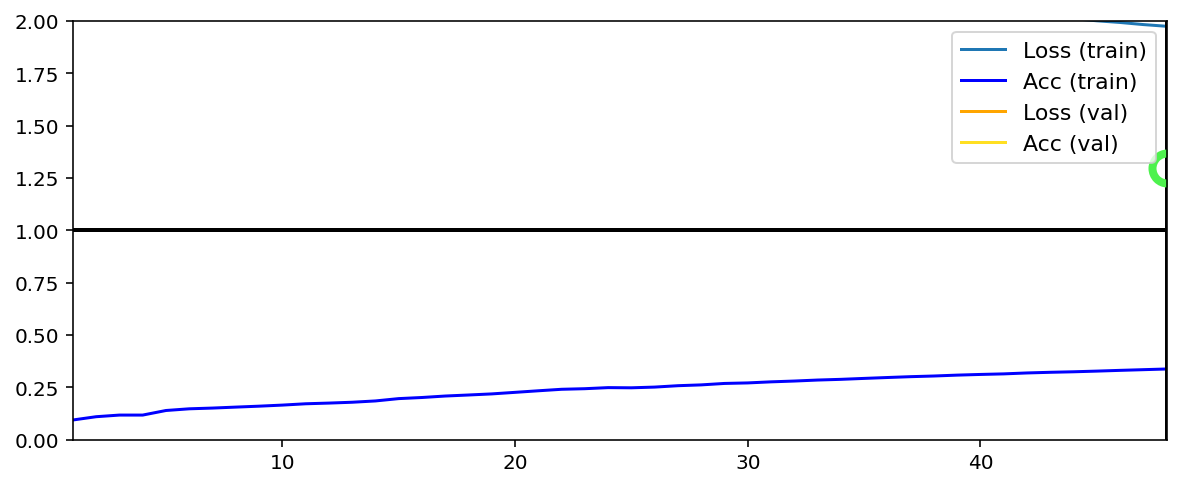


BATCHES FIT: 48



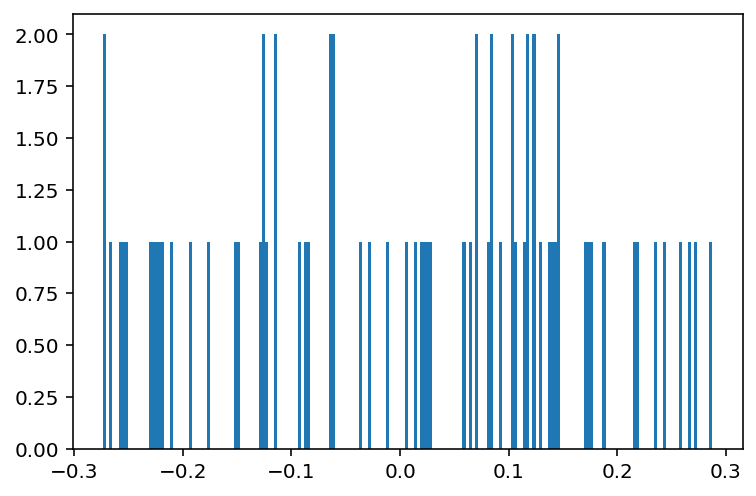


Data set_nums shuffled


_____________________
 EPOCH 2 -- COMPLETE 


BATCHES FIT: 96



Validating...
TrainGenerator state saved
Model report generated and saved
Best model saved to C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\models\M1__model-Adam__min.698
TrainGenerator state saved
Model report generated and saved


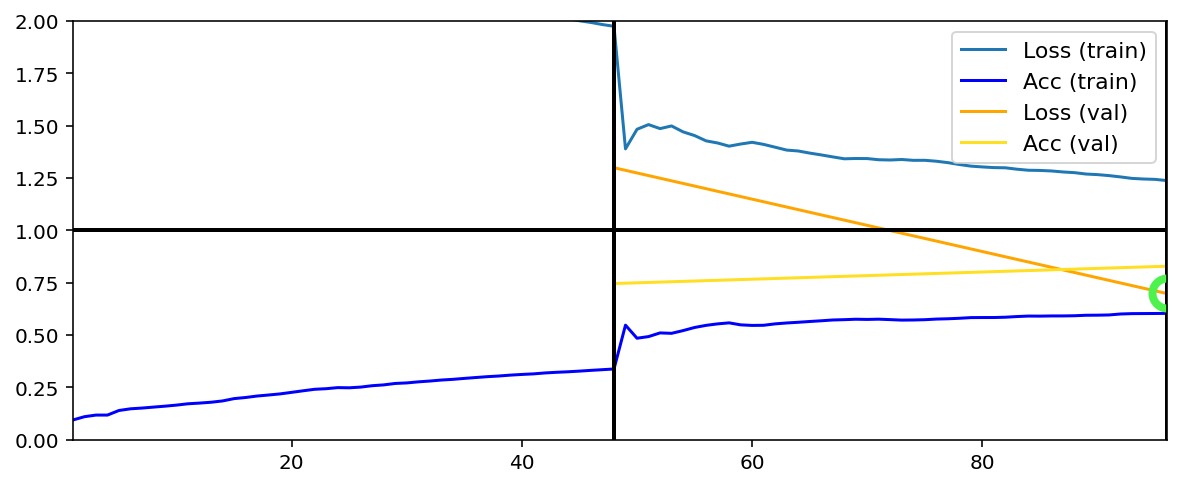


BATCHES FIT: 96



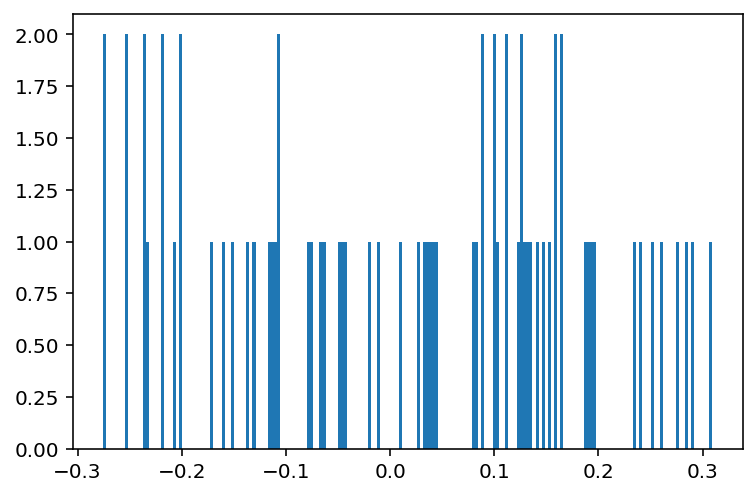


Data set_nums shuffled


_____________________
 EPOCH 3 -- COMPLETE 


BATCHES FIT: 144



Validating...
TrainGenerator state saved
Model report generated and saved
Best model saved to C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\models\M1__model-Adam__min.506
TrainGenerator state saved
Model report generated and saved


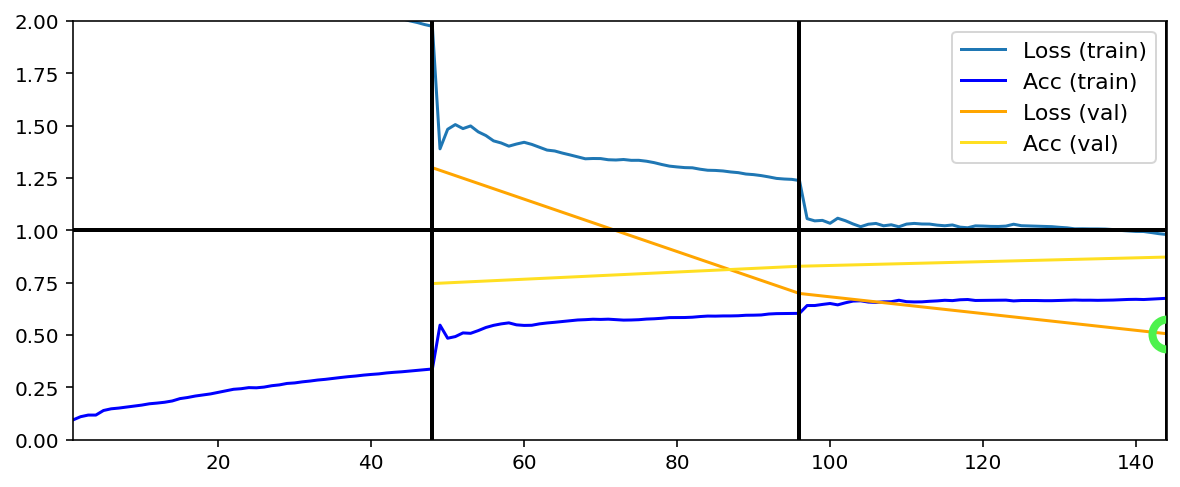


BATCHES FIT: 144



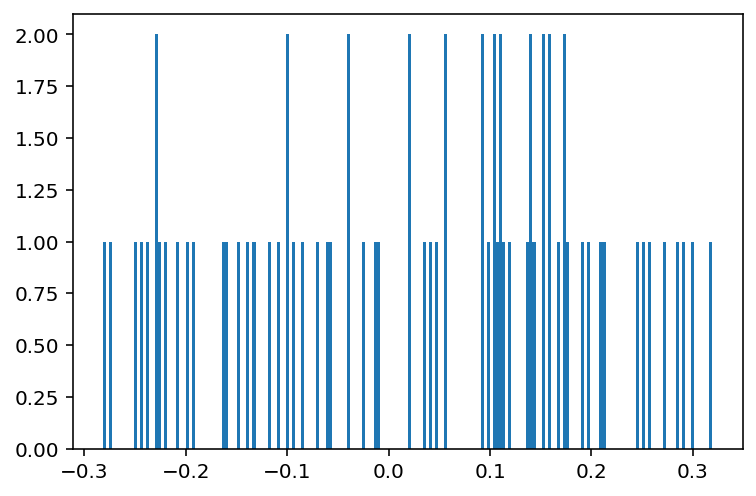


Data set_nums shuffled


_____________________
 EPOCH 4 -- COMPLETE 


BATCHES FIT: 192



Validating...
TrainGenerator state saved
Model report generated and saved
Best model saved to C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\models\M1__model-Adam__min.426
TrainGenerator state saved
Model report generated and saved


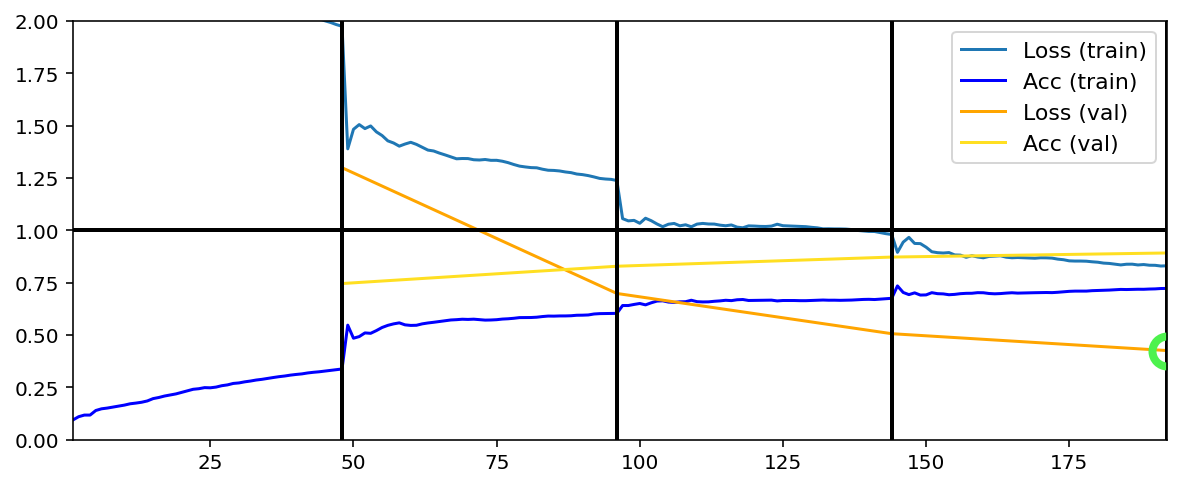


BATCHES FIT: 192



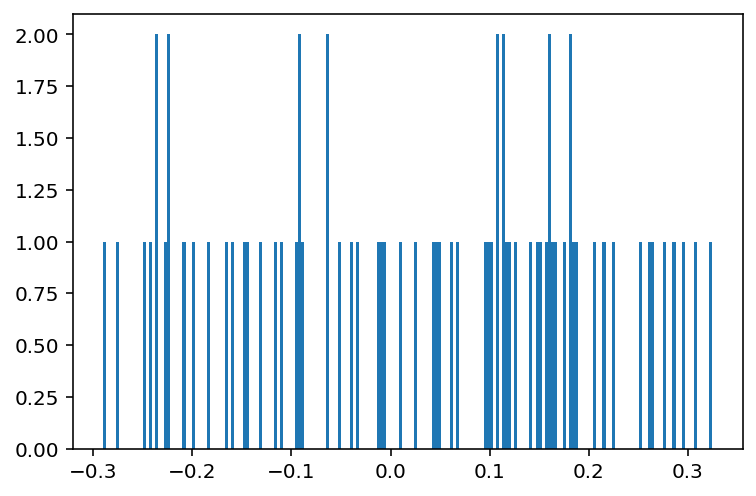

Training has concluded.


In [7]:
tg.train()